In [1]:
import pandas as pd
import numpy as np
import mason_functions as mf
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

#### pip install vega_datasets

You can use this library like so:

#### from vega_datasets import data

#### data.sf_temps()


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#import vega datasets
from vega_datasets import data

#set dataframe equal to data from sf_temps
df = data.sf_temps()

#check df
df

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
#get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
#set dataframe equal to df with date as the sorted index
df = df.set_index('date').sort_index()

In [5]:
#check it
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [6]:
#check df again
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [7]:
#assign new dataframe to data resampled by day and aggregate by mean
temp_by_day = df.resample('D').mean()

temp_by_day

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


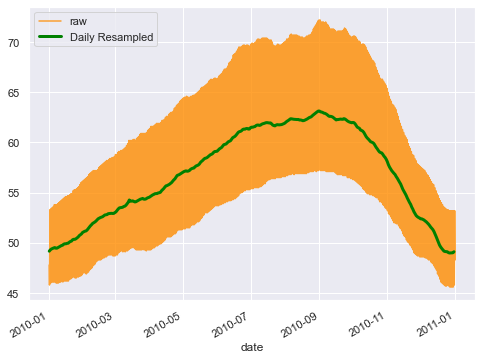

In [8]:
#visualize temperature over time
df.temp.plot(c = 'darkorange', label = 'raw', alpha = .8)

#visualize average temperature per day over time
temp_by_day.temp.plot(c = 'green', label = 'Daily Average Temperature', lw = 3)
plt.legend();

2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
#assign dataframe to frame resamples by day using minimum temperature
min_by_day = df.resample('D').min()
min_by_day

,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10
...,...
2010-12-27,45.60
2010-12-28,45.60
2010-12-29,45.60


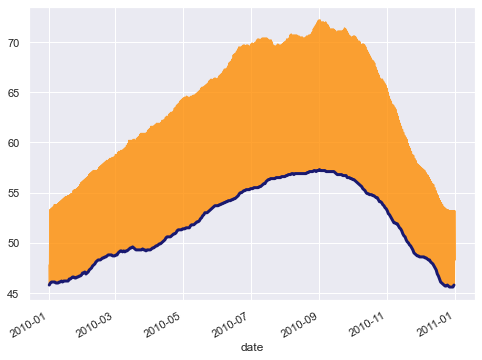

In [10]:
#visualize temperature over time
df.temp.plot(c = 'darkorange', label = 'raw', alpha = .8)

#visualize minimum temperature per day over time
min_by_day.temp.plot(c = 'midnightblue', label = 'Daily Minimum Temperature', lw = 3);

3. Write the code necessary to visualize maximum temperature over time.

In [11]:
#assign dataframe to original resampled by day (max temp)
max_by_day = df.resample('D').max()
max_by_day

,temp
date,
2010-01-01,53.30
2010-01-02,53.40
2010-01-03,53.50
2010-01-04,53.60
2010-01-05,53.80
...,...
2010-12-27,53.20
2010-12-28,53.20
2010-12-29,53.20


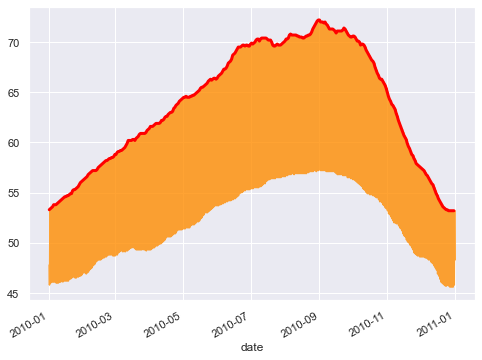

In [12]:
#visualize raw temperature data over time
df.temp.plot(c = 'darkorange', label = 'raw', alpha = .8)

#visualize maximum temperature per day over time
max_by_day.temp.plot(c = 'red', label = 'Daily Maximum Temperature', lw = 3);

4. Which month is the coldest, on average?

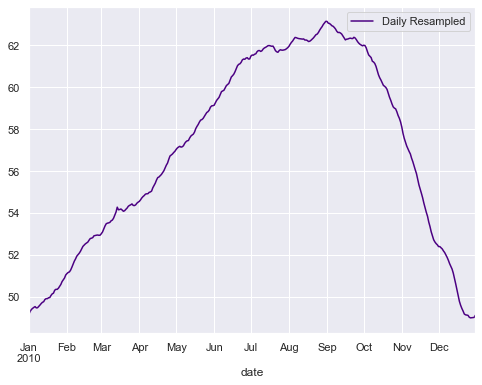

In [13]:
#visualize average temperature per day over time
temp_by_day.temp.plot(c = 'indigo', label = 'Daily Resampled')
plt.legend();

In [24]:
#pull up records where the minimum daily average temperature is present
temp_by_day[temp_by_day.temp == temp_by_day.temp.min()]

,temp
date,
2010-12-27,48.99


December has the coldest daily average temperature.

In [26]:
#resample by month using the minimum monthly temp
min_by_month = df.resample('M').min()
min_by_month

,temp
date,
2010-01-31,45.80
2010-02-28,46.90
2010-03-31,48.70
2010-04-30,49.30
2010-05-31,51.40
2010-06-30,53.70
2010-07-31,55.40
2010-08-31,56.60
2010-09-30,56.40


In [30]:
#pull up record where the minimum monthly temperature is the minimum measurement for this column
min_by_month[min_by_month.temp == min_by_month.temp.min()]

,temp
date,
2010-12-31,45.60


December is also coldest on average; it has the lowest monthly average temperature.

5. Which month has the highest average temperature?

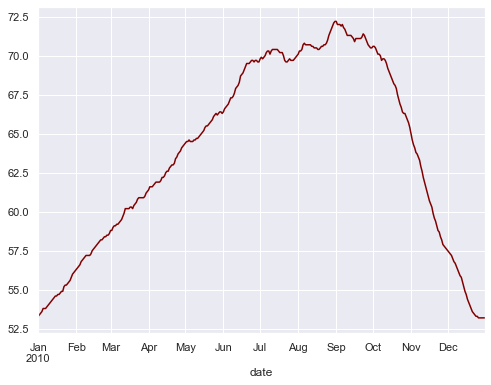

In [14]:
#visualize maximum temperature per day over time
max_by_day.temp.plot(c = 'maroon', label = 'Daily Resampled (Maximum Temperature)');

In [25]:
#pull up records where the maximum daily average temperature is present
temp_by_day[temp_by_day.temp == temp_by_day.temp.max()]

,temp
date,
2010-08-31,63.13
2010-09-01,63.13


August and September have the highest daily average temperature.

In [31]:
#resample by month using maximum monthly temperature
max_by_month = df.resample('M').max()

#check it
max_by_month

,temp
date,
2010-01-31,56.20
2010-02-28,58.60
2010-03-31,61.30
2010-04-30,64.30
2010-05-31,66.40
2010-06-30,69.70
2010-07-31,70.40
2010-08-31,72.20
2010-09-30,72.20


In [32]:
#pull up records where the monthly maximum temperature is present
max_by_month[max_by_month.temp == max_by_month.temp.max()]

,temp
date,
2010-08-31,72.20
2010-09-30,72.20


August and September have the highest monthly average temperature.

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

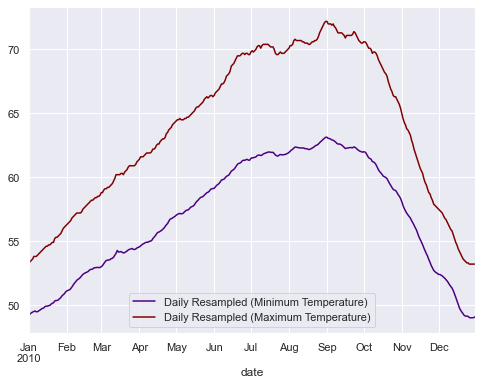

In [15]:
#visualize average temperature per day over time
temp_by_day.temp.plot(c = 'indigo', label = 'Daily Resampled (Minimum Temperature)')

#visualize maximum temperature per day over time
max_by_day.temp.plot(c = 'maroon', label = 'Daily Resampled (Maximum Temperature)')

#labels
plt.legend();

In [16]:
#resample dataframe
daily_extremes = df.resample('D').agg(['max', 'min'])

In [17]:
#check table info
daily_extremes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (temp, max)  365 non-null    float64
 1   (temp, min)  365 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [18]:
#assign new column to the difference between the max and min temp
daily_extremes.columns = ['maximum', 'minimum']
daily_extremes['variance'] = daily_extremes.maximum - daily_extremes.minimum

In [19]:
#check it
daily_extremes

,maximum,minimum,variance
date,,,
2010-01-01,53.30,45.80,7.50
2010-01-02,53.40,46.00,7.40
2010-01-03,53.50,46.10,7.40
2010-01-04,53.60,46.10,7.50
2010-01-05,53.80,46.10,7.70
...,...,...,...
2010-12-27,53.20,45.60,7.60
2010-12-28,53.20,45.60,7.60
2010-12-29,53.20,45.60,7.60


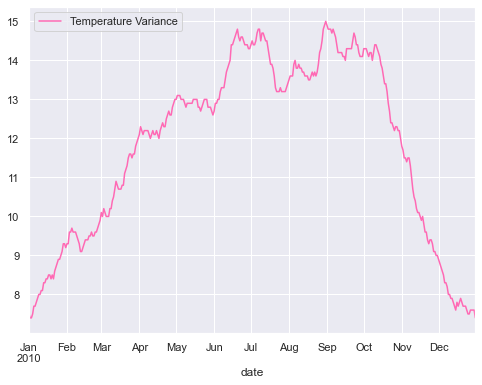

In [20]:
#plot the variance of temperature by day over time
daily_extremes.variance.plot(c = 'hotpink', label = 'Temperature Variance')
plt.legend();

In [21]:
#pull up the row where the variance is highest
daily_extremes[daily_extremes.variance == daily_extremes.variance.max()]

,maximum,minimum,variance
date,,,
2010-08-31,72.20,57.20,15.00


August has the highest daily temperature variance.

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

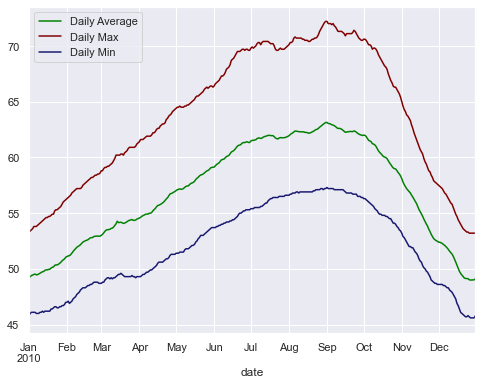

In [34]:
temp_by_day.temp.plot(c = 'green', label = 'Daily Average')
max_by_day.temp.plot(c = 'maroon', label = 'Daily Max')
min_by_day.temp.plot(c = 'midnightblue', label = 'Daily Min')
plt.legend();